In [1]:
from collections import defaultdict
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import string, nltk
from nltk.corpus import stopwords

In [2]:
restaurant_file = "final_data_restaurant_yelp.gzip"
user_file = "final_data_user_yelp.gzip"
review_file = "final_data_review_yelp-001.gzip"

In [3]:
restaurant_data = pd.read_pickle(restaurant_file)
user_data = pd.read_pickle(user_file)
review_data = pd.read_pickle(review_file)

Fan Analysis

In [5]:
# Get 5 users with the most fans
top_5_users_df = user_data.nlargest(5, "fans")
top_5_users_df

,user_id,review_count,useful,fans
5444,37cpUoM8hlkSQfReIEBd-Q,1882,22860,12497
198889,hizGc5W1tBHPghM5YKCAtg,1825,48711,3642
17169,Hi10sGSZNxQH3NLyWSZ1oA,17473,206296,3493
200787,JjXuiru1_ONzDkYVrHN0aw,1424,183512,3243
1,j14WgRoU_-2ZE1aw1dXrJg,4333,43091,3138


In [14]:
# Review data for top 5 users
top_5_users_df1 = review_data.loc[review_data["user_id"].isin(top_5_users_df["user_id"].to_numpy())]
top_5_users_df1.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
80913,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,ompDR5sUDpoI6gnTldmneQ,3,3,1,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56


In [13]:
# Global average rating of restaurants
rest_global_avg = restaurant_data["stars"].mean(axis=0)
rest_global_avg

3.5152335233140803

In [15]:
ratings = []
for i, d in top_5_users_df1.iterrows():
    if (d["stars"] < rest_global_avg) and (restaurant_data.loc[restaurant_data["business_id"] == d["business_id"], "stars"].item() < rest_global_avg):
        ratings.append(1)
    elif (d["stars"] > rest_global_avg) and (restaurant_data.loc[restaurant_data["business_id"] == d["business_id"], "stars"].item() > rest_global_avg):
        ratings.append(1)
    else:
        ratings.append(0)
sum(ratings)/len(ratings) # Accuracy

0.7490636704119851

In [4]:
restaurant_data = restaurant_data.reset_index()
restaurant_data = restaurant_data[["business_id", "name", "city", "state",
       "latitude", "longitude", "stars", "review_count", "categories"]]
restaurant_data.head(1)

,business_id,name,city,state,latitude,longitude,stars,review_count,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."


In [6]:
review_data = review_data.reset_index()
review_data = review_data[['review_id', 'user_id', 'business_id', 'stars', 'text']]
review_data.head(1)

Index(['level_0', 'index', 'review_id', 'user_id', 'business_id', 'stars',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [ ]:
ca_restaurant_data = restaurant_data.loc[restaurant_data["state"] == "CA"].reset_index().drop("index", axis=1)
ca_restaurant_data.head(1)

,business_id,name,city,state,latitude,longitude,stars,review_count,categories
0,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,Santa Barbara,CA,34.414445,-119.690672,4.0,389,"Food, Restaurants, Salad, Coffee & Tea, Breakf..."


Data Visualization

1) City vs. Number of restaurants
2) City vs. Number of reviews
3) State vs. Number of restaurants
4) State vs. Number of reviews
5) Top restaurants vs. Number of reviews
6) Top Categories vs. Average star rating
7) Top 10-15 words vs. Average star rating

19 states, 920 cities, 52286 restaurants

State-wise visualization

In [ ]:
restaurants_per_state = defaultdict(set)
rating_per_state = defaultdict(list)
reviews_per_state = defaultdict(int)

for i, d in restaurant_data.iterrows():
    s = d["state"]
    r = d["business_id"]
    rating = d["stars"]
    rc = d["review_count"]
    restaurants_per_state[s].add(r)
    rating_per_state[s].append(rating)
    reviews_per_state[s] += rc

In [ ]:
# Plot Pie Chart
def plot_pie_chart(values, labels, title=""):
    fig = plt.subplots(figsize=(8, 8))
    plt.pie(values, labels = labels)
    plt.title(title, fontsize=20)
    plt.show()

# Plot Bar Graph
def plot_bar_graph(values, labels, title="", xlabel="", ylabel="", angle=0):
    fig = plt.subplots(figsize=(8, 5))
    plt.bar(labels, values)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(rotation=angle)
    plt.show()

In [ ]:
# These states have only 1 restaurant => Combine them together
for s in ["NC","CO","HI","MT","XMS"]:
    restaurants_per_state["Other"].add(i for i in restaurants_per_state.pop(s))

num_rest = [len(restaurants_per_state[s]) for s in restaurants_per_state]

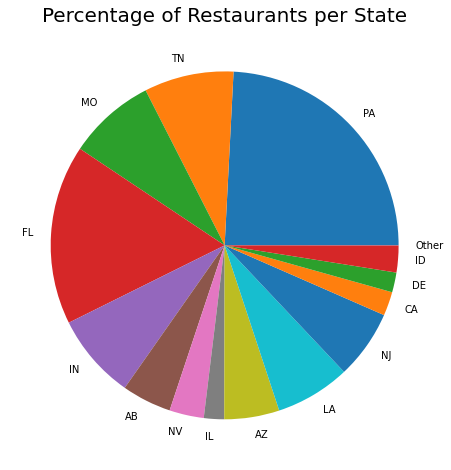

In [ ]:
# Pie chart for number of restaurants per state
plot_pie_chart(num_rest, restaurants_per_state.keys(), "Percentage of Restaurants per State")

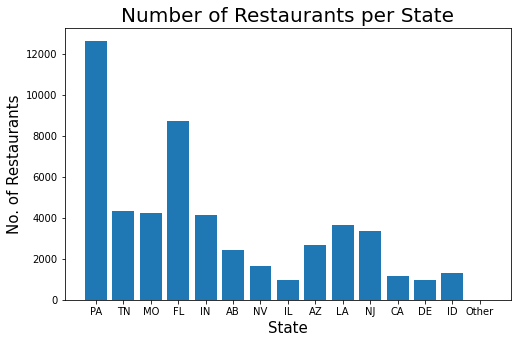

In [ ]:
# Bar graph for number of restaurants per state
plot_bar_graph(num_rest, restaurants_per_state.keys(), "Number of Restaurants per State", "State", "No. of Restaurants")

In [ ]:
# These states have only 1 restaurant and very less reviews
for s in ["NC","CO","HI","MT","XMS"]:
    reviews_per_state.pop(s)

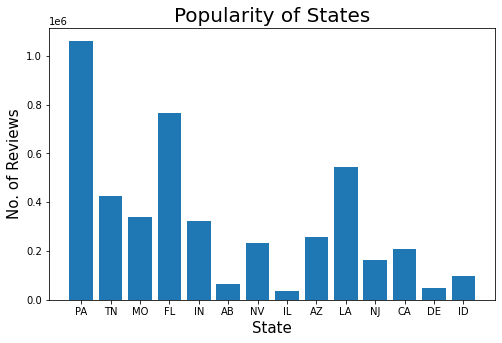

In [ ]:
# Bar graph for number of reviews per state
# This indicates the popularity of the state
plot_bar_graph(reviews_per_state.values(), reviews_per_state.keys(), "Popularity of States", "State", "No. of Reviews")

In [ ]:
# Average number of reviews per state
avg_reviews_per_state = defaultdict(float)
for s in reviews_per_state:
    avg_reviews_per_state[s] = reviews_per_state[s]/len(restaurants_per_state[s])
avg_reviews_per_state

defaultdict(float,
            {'PA': 83.90786143625435,
             'TN': 97.34918447048013,
             'MO': 80.33851224105462,
             'FL': 87.47652313330279,
             'IN': 78.04939759036145,
             'AB': 27.551037344398342,
             'NV': 138.56119402985075,
             'IL': 35.93082400813835,
             'AZ': 95.47177570093459,
             'LA': 149.67536391101345,
             'NJ': 48.97158241100808,
             'CA': 177.6244616709733,
             'DE': 48.92203742203742,
             'ID': 74.03220858895706})

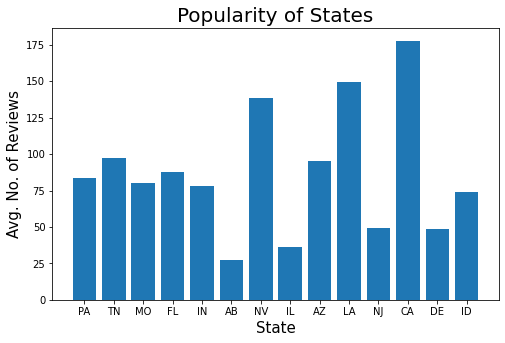

In [ ]:
# Popularity based on average number of reviews
plot_bar_graph(avg_reviews_per_state.values(), avg_reviews_per_state.keys(), "Popularity of States", "State", "Avg. No. of Reviews")

Since California is the most popular state, we will proceed with CA dataset

Visualization for California State

In [ ]:
# Number of reviews in California
ca_restaurant_data["review_count"].sum()

206222

In [ ]:
restaurants_per_city = defaultdict(set)
rating_per_city = defaultdict(list)
reviews_per_city = defaultdict(int)
reviews_per_restaurant = defaultdict(int)
ca_restaurants = []

for i, d in ca_restaurant_data.iterrows():
    c = d["city"]
    r = d["business_id"]
    rating = d["stars"]
    rc = d["review_count"]
    n = d["name"]
    restaurants_per_city[c].add(r)
    rating_per_city[c].append(rating)
    reviews_per_city[c] += rc
    reviews_per_restaurant[n] += rc
    ca_restaurants.append(r)

In [ ]:
# 'Santa Barbara', 'Isla Vista', 'Goleta', 'Carpinteria', 'Montecito', 'Summerland', 'Santa  Barbara', 'Truckee'
# Santa Barbara is repeated twice => Combining both
for r in restaurants_per_city["Santa  Barbara"]:
    restaurants_per_city["Santa Barbara"].add(r)
restaurants_per_city.pop("Santa  Barbara")

# Truckee and Summerland have less than 10 restaurants => Combining both into one
for c in ["Summerland", "Truckee"]:
    for r in restaurants_per_city[c]:
        restaurants_per_city["Other"].add(r)
    restaurants_per_city.pop(c)

num_rest_per_city = [len(restaurants_per_city[c]) for c in restaurants_per_city]

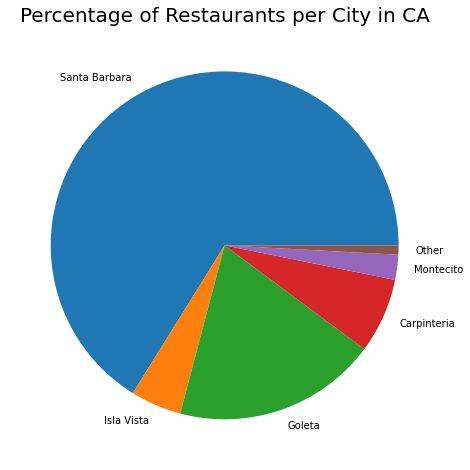

In [ ]:
# Pie chart for number of restaurants per city in CA
plot_pie_chart(num_rest_per_city, restaurants_per_city.keys(), "Percentage of Restaurants per City in CA")

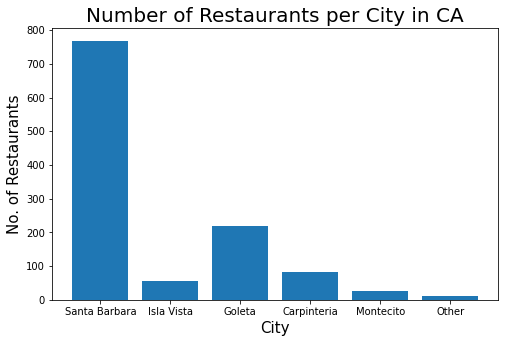

In [ ]:
# Bar graph for number of restaurants per city in CA
plot_bar_graph(num_rest_per_city, restaurants_per_city.keys(), "Number of Restaurants per City in CA", "City", "No. of Restaurants")

In [ ]:
# Santa Barbara is repeated twice => Combining both
reviews_per_city["Santa Barbara"] += reviews_per_city["Santa  Barbara"]
reviews_per_city.pop("Santa  Barbara")

# Truckee and Summerland have less than 10 restaurants => Combining both into one
for c in ["Summerland", "Truckee"]:
    reviews_per_city["Other"] += reviews_per_city[c]
    reviews_per_city.pop(c)

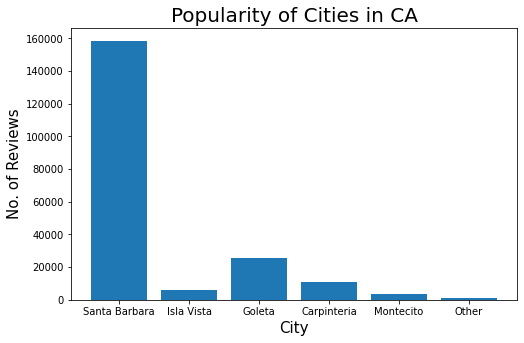

In [ ]:
# Bar graph for number of reviews per city in CA
# This indicates the popularity of the city
plot_bar_graph(reviews_per_city.values(), reviews_per_city.keys(), "Popularity of Cities in CA", "City", "No. of Reviews")

In [ ]:
# Average number of reviews per city
avg_reviews_per_city = defaultdict(float)
for c in reviews_per_city:
    avg_reviews_per_city[c] = reviews_per_city[c]/len(restaurants_per_city[c])
avg_reviews_per_city

defaultdict(float,
            {'Santa Barbara': 206.23958333333334,
             'Isla Vista': 112.2909090909091,
             'Goleta': 116.91363636363636,
             'Carpinteria': 136.97530864197532,
             'Montecito': 130.22222222222223,
             'Other': 132.2})

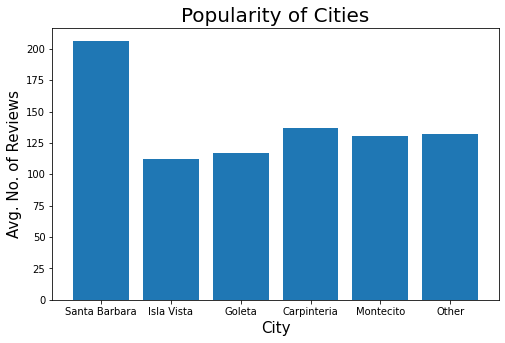

In [ ]:
# Popularity based on average number of reviews
plot_bar_graph(avg_reviews_per_city.values(), avg_reviews_per_city.keys(), "Popularity of Cities", "City", "Avg. No. of Reviews")

In [ ]:
# Get top 10 popular restaurants in CA based on number of reviews
top_10_restaurants = {k: v for k, v in sorted(reviews_per_restaurant.items(), key=lambda item: item[1])[-10:]}

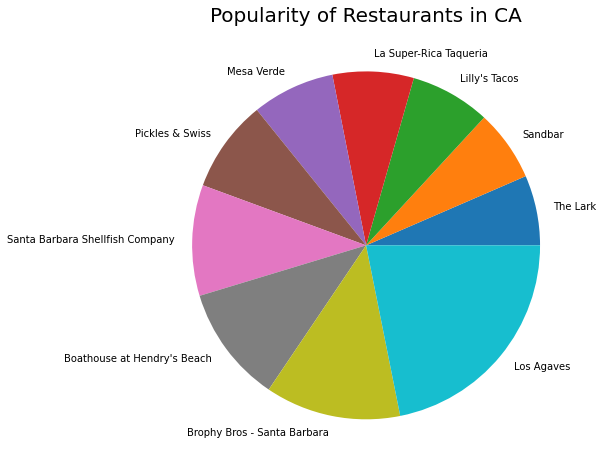

In [ ]:
# Pie chart for number of reviews for top 10 restaurants at CA
plot_pie_chart(top_10_restaurants.values(), top_10_restaurants.keys(), "Popularity of Restaurants in CA")

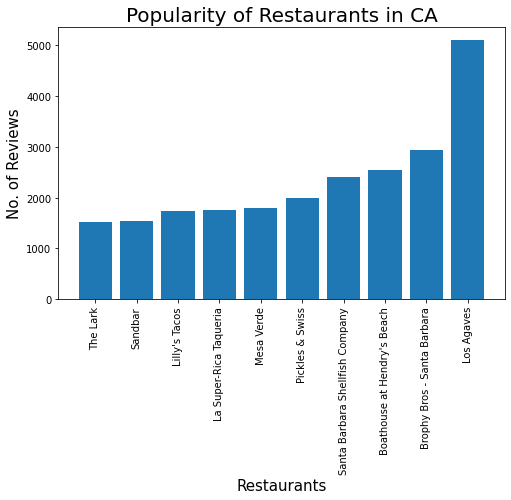

In [ ]:
# Bar graph for number of reviews for top 10 restaurants at CA
plot_bar_graph(top_10_restaurants.values(), top_10_restaurants.keys(), "Popularity of Restaurants in CA", "Restaurants", "No. of Reviews", 90)

Top Categories for CA dataset

In [ ]:
categories = defaultdict(int)
ratings_per_category = defaultdict(list)
for i, d in ca_restaurant_data.iterrows():
    cats = d["categories"].split(",")
    r = d["stars"]
    for cat in cats:
        cat = cat.strip()
        categories[cat] += 1
        ratings_per_category[cat].append(r)

len(categories)

251

In [ ]:
# Get top 10 most frequent categories
top_10_categories = {k: v for k, v in sorted(categories.items(), key=lambda item: item[1])[-12:-2]}
top_10_categories

{'Burgers': 100,
 'Pizza': 113,
 'Coffee & Tea': 115,
 'American (Traditional)': 144,
 'Breakfast & Brunch': 170,
 'Sandwiches': 174,
 'Mexican': 189,
 'Bars': 200,
 'American (New)': 202,
 'Nightlife': 216}

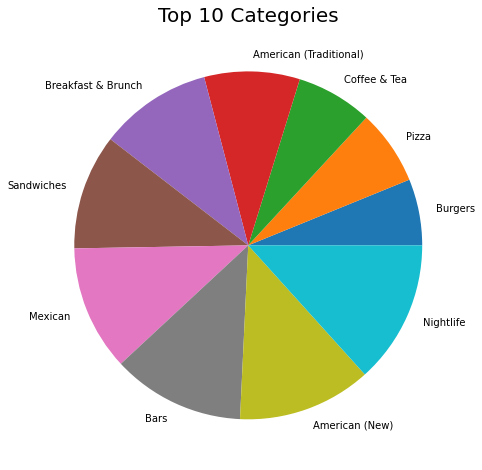

In [ ]:
# Pie chart for top 10 most frequent categories
plot_pie_chart(top_10_categories.values(), top_10_categories.keys(), "Top 10 Categories")

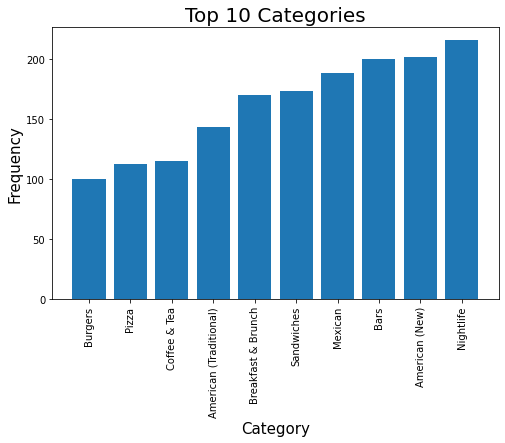

In [ ]:
# Bar graph for top 10 most frequent categories
plot_bar_graph(top_10_categories.values(), top_10_categories.keys(), "Top 10 Categories", "Category", "Frequency", 90)

In [ ]:
# Average rating per category
avg_rating_per_category = defaultdict(float)
for cat in top_10_categories:
    avg_rating_per_category[cat] = sum(ratings_per_category[cat])/len(ratings_per_category[cat])
avg_rating_per_category

defaultdict(float,
            {'Coffee & Tea': 3.8217391304347825,
             'American (Traditional)': 3.6979166666666665,
             'Breakfast & Brunch': 3.788235294117647,
             'Sandwiches': 3.7557471264367814,
             'Mexican': 3.7698412698412698,
             'Bars': 3.9325,
             'American (New)': 3.9034653465346536,
             'Nightlife': 3.928240740740741,
             'Food': 3.944168734491315,
             'Restaurants': 3.7627045650301465})

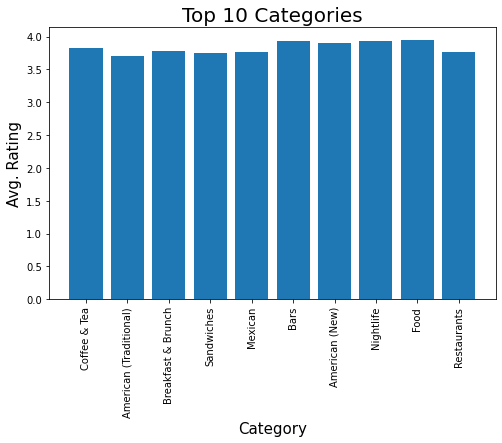

In [ ]:
# Bar graph for the best category based on average rating
plot_bar_graph(avg_rating_per_category.values(), avg_rating_per_category.keys(), "Top 10 Categories", "Category", "Avg. Rating", 90)

Considering the Reviews Dataset

In [ ]:
# Get reviews specific to CA restaurants
ca_review_data = review_data.loc[review_data["business_id"].isin(ca_restaurants)].reset_index().drop("index", axis=1)
ca_review_data.head(1)

,review_id,user_id,business_id,stars,text
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,Had a party of 6 here for hibachi. Our waitres...


Reviews per User

In [ ]:
rev_per_user = pd.DataFrame(ca_review_data.groupby("user_id").size()).reset_index()
rev_per_user.columns = ["user_id", "count"]
# rev_per_user.head()

# unique_users = rev_per_user.shape[0]
rev_per_user.groupby("count").size()

count
1      74752
2      15702
3       6194
4       3059
5       1804
       ...  
205        1
228        1
243        1
247        1
256        1
Length: 105, dtype: int64

Word Analysis

In [ ]:
# Get the basic words in English
stop_words = set(stopwords.words("english"))

In [ ]:
# Get the word count and ratings for each word for each review in CA review dataset
word_count = defaultdict(int)
ratings_per_word = defaultdict(list)

for i, d in ca_review_data.iterrows():
    text = d["text"]
    rating = d["stars"]
    text = text.translate(str.maketrans('', '', string.punctuation)).replace("\n","").lower().split(" ")
    for word in text:
        if word in stop_words:
            continue
        word_count[word] += 1
        ratings_per_word[word].append(rating)

word_count.pop("")
ratings_per_word.pop("")
len(word_count)

199815

In [ ]:
# Get the top 15 frequently used words
top_15_words = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1])[-15:]}
top_15_words

{'us': 43791,
 'delicious': 45387,
 'go': 45725,
 'would': 47958,
 'get': 50381,
 'really': 51373,
 'time': 52998,
 'back': 54405,
 'one': 55380,
 'like': 59530,
 'service': 77684,
 'great': 98018,
 'place': 105408,
 'good': 112032,
 'food': 142965}

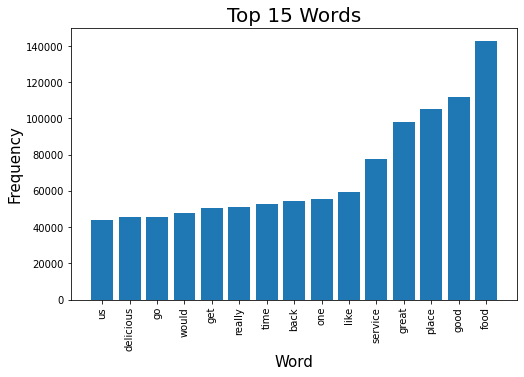

In [ ]:
# Bar graph for the top 15 words based on frequency
plot_bar_graph(top_15_words.values(), top_15_words.keys(), "Top 15 Words", "Word", "Frequency", 90)

In [ ]:
# Average rating per word for top 15 words
avg_rating_per_word = defaultdict(float)
for word in top_15_words:
    avg_rating_per_word[word] = sum(ratings_per_word[word])/len(ratings_per_word[word])
avg_rating_per_word

defaultdict(float,
            {'us': 3.26882236075906,
             'delicious': 4.5663075329940295,
             'go': 3.7098305084745764,
             'would': 3.405271279035823,
             'get': 3.557928584188484,
             'really': 3.8216767562727503,
             'time': 3.676082116306276,
             'back': 3.7284992188217996,
             'one': 3.593102202961358,
             'like': 3.465966739459096,
             'service': 3.728824468358993,
             'great': 4.344763206757943,
             'place': 3.9094660746812386,
             'good': 3.8686000428449017,
             'food': 3.7357465113839052})

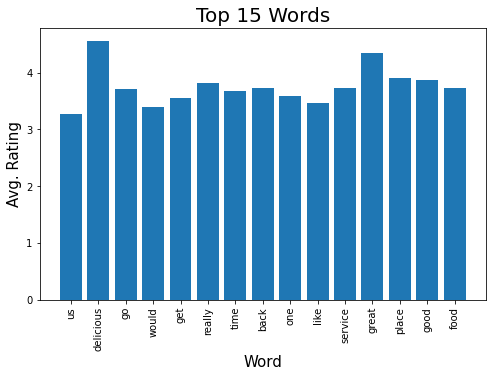

In [ ]:
# Bar graph for the top 15 words based on average rating
plot_bar_graph(avg_rating_per_word.values(), avg_rating_per_word.keys(), "Top 15 Words", "Word", "Avg. Rating", 90)

In [ ]:
# Average rating for each word
avg_rating_per_word = defaultdict(float)
for word in ratings_per_word:
    avg_rating_per_word[word] = sum(ratings_per_word[word])/len(ratings_per_word[word])
avg_rating_per_word

defaultdict(float,
            {'party': 3.415421686746988,
             '6': 3.3918305597579423,
             'hibachi': 3.5097087378640777,
             'waitress': 2.9123196448390676,
             'brought': 3.3266303588884236,
             'separate': 3.305776892430279,
             'sushi': 3.7262995467258175,
             'orders': 3.0152931180968565,
             'one': 3.593102202961358,
             'plate': 3.56520202615149,
             'couldnt': 3.2586861313868614,
             'really': 3.8216767562727503,
             'tell': 3.3537275064267353,
             'whos': 3.538011695906433,
             'forgot': 2.9681451612903227,
             'several': 3.5237404105328634,
             'items': 3.7580622247478335,
             'order': 3.2468770632510235,
             'understand': 2.630456852791878,
             'making': 3.733810091378625,
             'mistakes': 2.303867403314917,
             'restaraunt': 3.927536231884058,
             'quiet': 4.035279805352798,
   

In [ ]:
# Get the top 15 words based on average rating
top_15_words = {k: v for k, v in sorted(avg_rating_per_word.items(), key=lambda item: item[1])[-15:]}
top_15_words

{'anyoneprice': 5.0,
 'taos3': 5.0,
 'peeta': 5.0,
 'oilchanged': 5.0,
 'upholy': 5.0,
 'galingol': 5.0,
 'trendyromantic': 5.0,
 'falsinis': 5.0,
 'classism': 5.0,
 'juliofood': 5.0,
 'neverthis': 5.0,
 'pashwari': 5.0,
 'latinxowned': 5.0,
 'businesstheir': 5.0,
 'soyeahservice': 5.0}

In [ ]:
# Get the bottom 15 words based on average rating
bottom_15_words = {k: v for k, v in sorted(avg_rating_per_word.items(), key=lambda item: item[1])[:15]}
bottom_15_words

{'apologyi': 1.0,
 'execrable': 1.0,
 'inferiorfrozen': 1.0,
 'serviceownershipmanagement': 1.0,
 'lotapparently': 1.0,
 'wrinklynot': 1.0,
 'wrinklymy': 1.0,
 'wrinklefreemoney': 1.0,
 'sequential': 1.0,
 'hereneedless': 1.0,
 'miniwaffle': 1.0,
 'plateafter': 1.0,
 'syrupand': 1.0,
 'tastelessnot': 1.0,
 'workingon': 1.0}

Using Adjectives

In [ ]:
# # Get the word count and ratings for each word for each review in CA review dataset
# word_count = defaultdict(int)
# ratings_per_word = defaultdict(list)
# # ct = 0
# for i, d in ca_review_data.iterrows():
#     text = d["text"]
#     rating = d["stars"]
#     for t in text.split("."):
#         t = t.translate(str.maketrans('', '', string.punctuation)).replace("\n","").lower().strip()
#         t = [word for word,tag in nltk.pos_tag(nltk.word_tokenize(t)) if tag[0] in "NJ"]
#         for word in t:
#             if word in stop_words:
#                 continue
#             word_count[word] += 1
#             ratings_per_word[word].append(rating)
#     # if ct%10000 == 0:
#     #     print(ct)
#     # ct += 1
# # word_count.pop("")
# # ratings_per_word.pop("")
# len(word_count)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


111188

In [ ]:
# # Average rating for each word
# avg_rating_per_word = defaultdict(float)
# for word in ratings_per_word:
#     avg_rating_per_word[word] = sum(ratings_per_word[word])/len(ratings_per_word[word])
# avg_rating_per_word

defaultdict(float,
            {'party': 3.4167992363983455,
             'hibachi': 3.549738219895288,
             'waitress': 2.9156225745648077,
             'separate': 3.3107221006564553,
             'sushi': 3.725658419792498,
             'orders': 3.01652719665272,
             'plate': 3.5548809523809526,
             'whos': 3.551851851851852,
             'several': 3.5225299710624225,
             'items': 3.756548536209553,
             'order': 3.245757401702261,
             'mistakes': 2.2989130434782608,
             'restaraunt': 3.8840579710144927,
             'quiet': 4.0433190970103725,
             'kind': 3.7564273276656763,
             'surprised': 3.830508474576271,
             'fun': 4.302019665160776,
             'experience': 3.674825174825175,
             'cook': 2.9321880650994574,
             'words': 3.756164383561644,
             'name': 3.5434826270335407,
             'francisco': 4.117744610281924,
             'service': 3.7266973894044226,

In [ ]:
# # Get the top 15 words based on average rating
# top_15_words = {k: v for k, v in sorted(avg_rating_per_word.items(), key=lambda item: item[1])[-15:]}
# top_15_words

{'wellorderedjuicy': 5.0,
 'sakeyet': 5.0,
 'unigoodness': 5.0,
 'juneshine': 5.0,
 'unilover': 5.0,
 'wabisabi': 5.0,
 'anyoneprice': 5.0,
 'peeta': 5.0,
 'galingol': 5.0,
 'trendyromantic': 5.0,
 'falsinis': 5.0,
 'classism': 5.0,
 'neverthis': 5.0,
 'steakshrimp': 5.0,
 'pashwari': 5.0}

In [ ]:
# # Get the bottom 15 words based on average rating
# bottom_15_words = {k: v for k, v in sorted(avg_rating_per_word.items(), key=lambda item: item[1])[:15]}
# bottom_15_words

{'openit': 1.0,
 'execrable': 1.0,
 'inferiorfrozen': 1.0,
 'serviceownershipmanagement': 1.0,
 'sequential': 1.0,
 'marts': 1.0,
 'miniwaffle': 1.0,
 'wewe': 1.0,
 'syrupand': 1.0,
 'mymeal': 1.0,
 'waterdrinks': 1.0,
 'poseurs': 1.0,
 'researchread': 1.0,
 'owneranother': 1.0,
 'orderedit': 1.0}

In [ ]:
# # Get the top 15 frequently used words
# top_15_words = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1])[-15:]}
# top_15_words

{'staff': 30318,
 'menu': 30766,
 'santa': 32652,
 'barbara': 34158,
 'nice': 36861,
 'order': 38302,
 'best': 39732,
 'restaurant': 42753,
 'delicious': 46098,
 'time': 53849,
 'service': 79637,
 'great': 99386,
 'place': 105124,
 'good': 114061,
 'food': 145305}